In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv(r'C:\Users\Ganesh Jaiswar\Desktop\ODINSCHOOL\EDA AND ML\Price Prediction\Clean_Dataset.csv\Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
cat=df.select_dtypes('object')
cat=cat.drop('flight',axis=1)

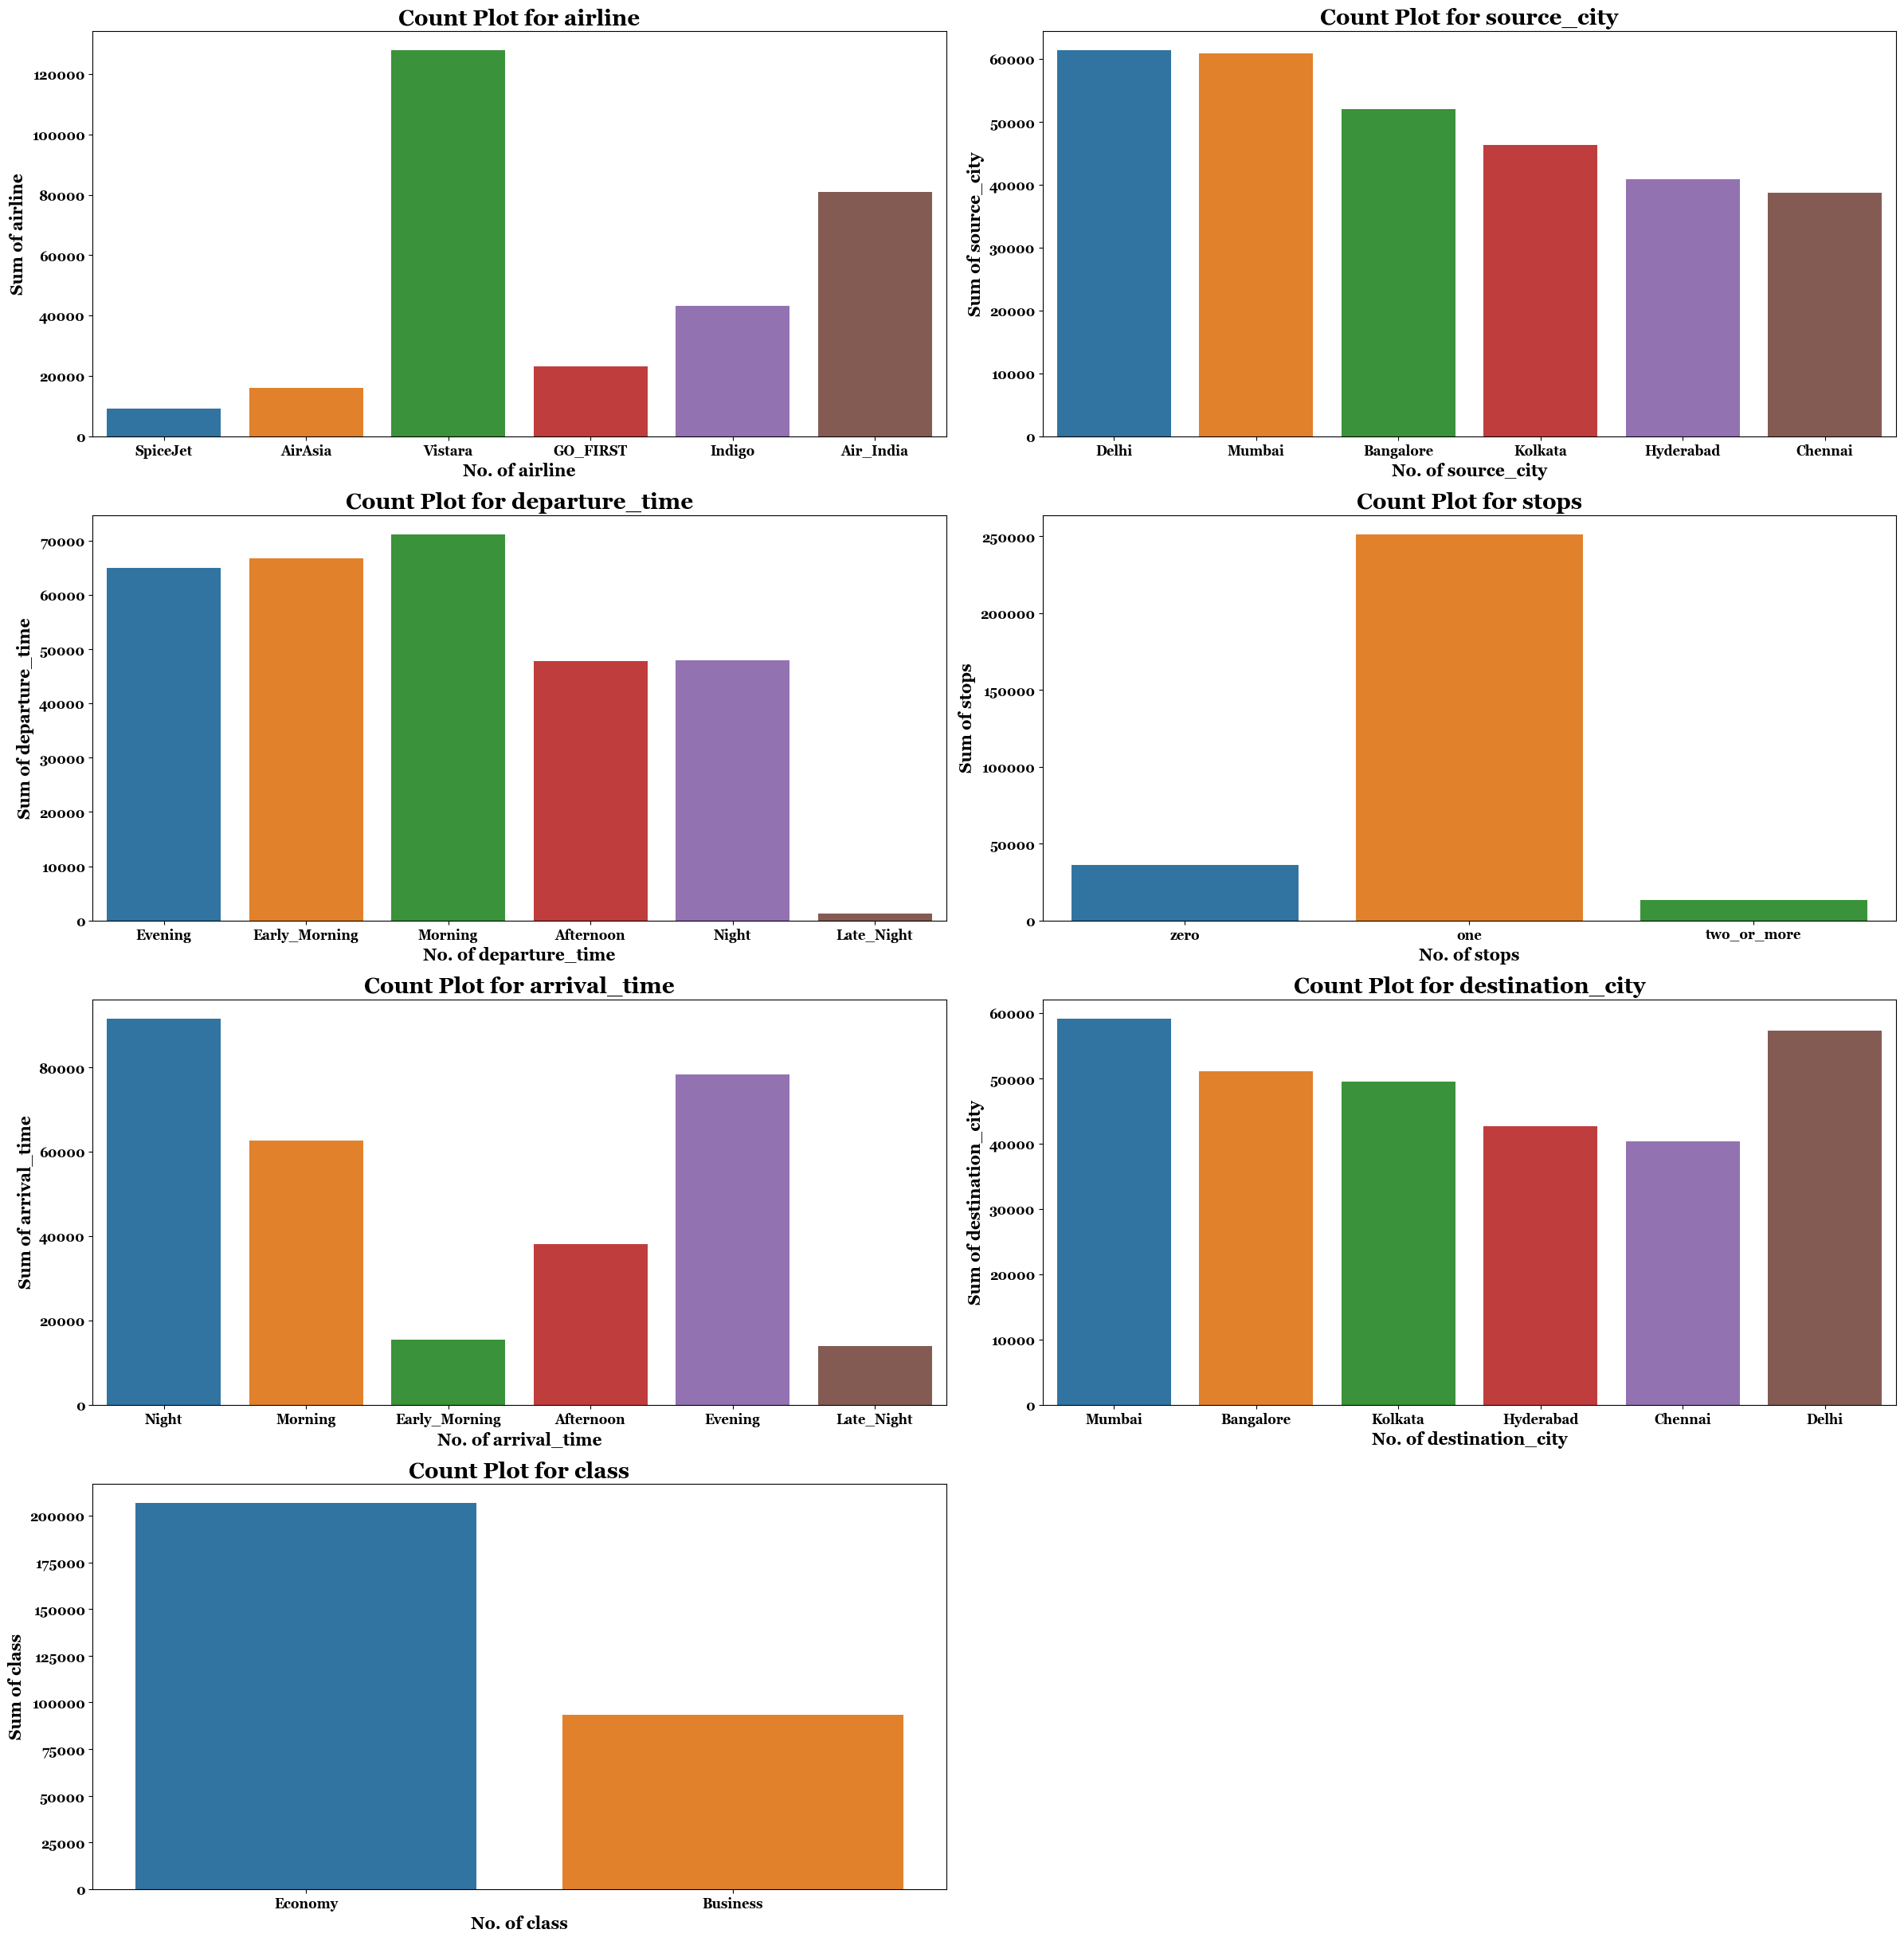

In [4]:
n = 0
plt.figure(figsize=(24, 30))
custom_fonts = ['Georgia']

for i in cat:
    n += 1
    plt.subplot(5, 2, n)
    custom_font = {'fontname': custom_fonts[0]} 

    sns.countplot(data=df, x=i)
    
    plt.ylabel(f'Sum of {i}', size=15, weight='bold', **custom_font)
    plt.xlabel(f'No. of {i}', size=15, weight='bold',**custom_font)
    
    plt.yticks(size=12, color='black', weight='bold',**custom_font)
    plt.xticks(size=12, rotation=0, weight='bold',**custom_font)

    plt.title(f'Count Plot for {i}', size=20, weight='bold',**custom_font)
    plt.tight_layout()

plt.show()


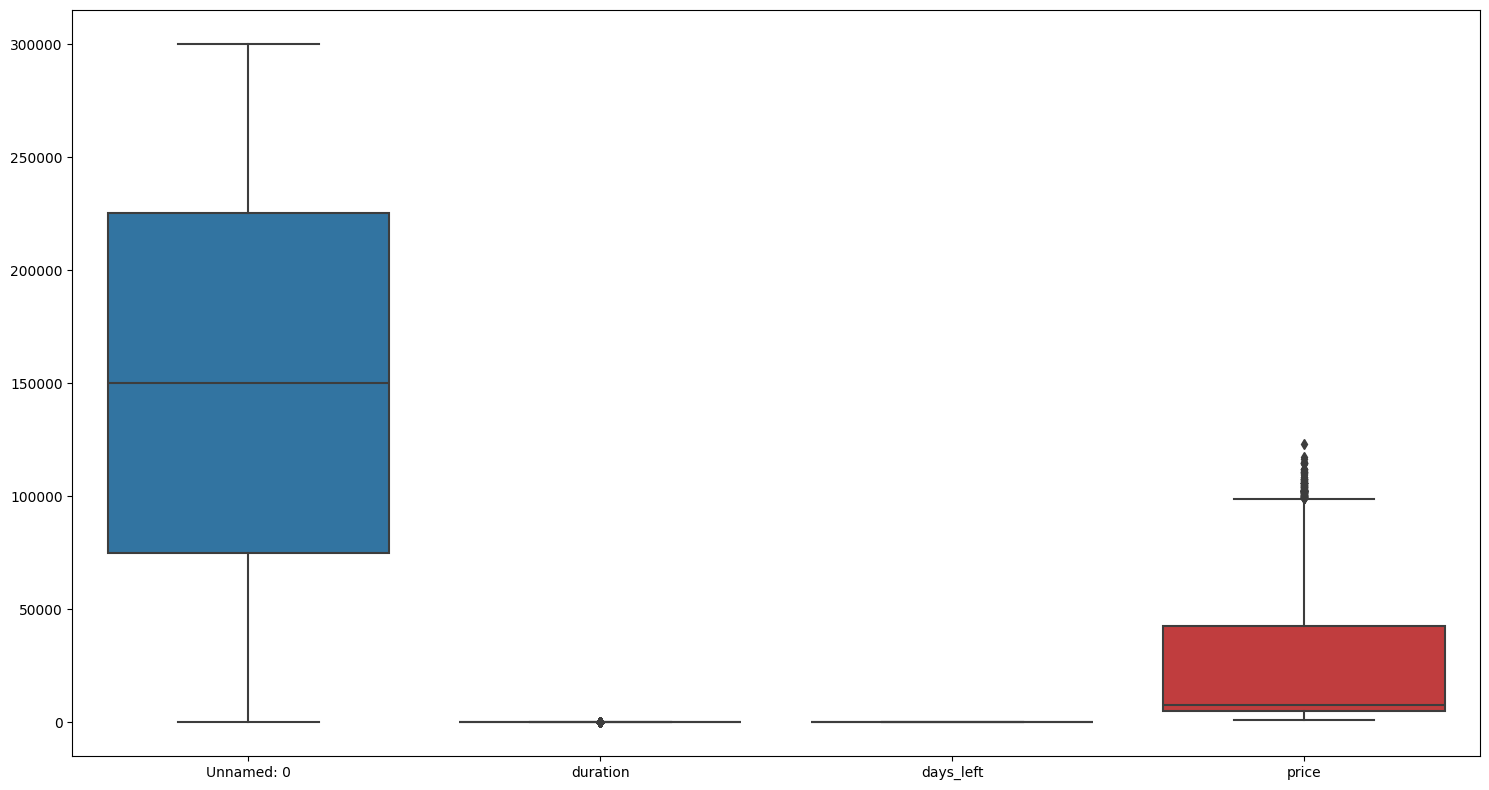

In [5]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.tight_layout()

## Convert Category to Numerical

In [5]:
from sklearn.preprocessing import LabelEncoder
encd=LabelEncoder()
for i in cat:
    df[i]=encd.fit_transform(df[i])
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [6]:
new_df=df.copy()
new_df.drop('flight',axis=1,inplace=True)

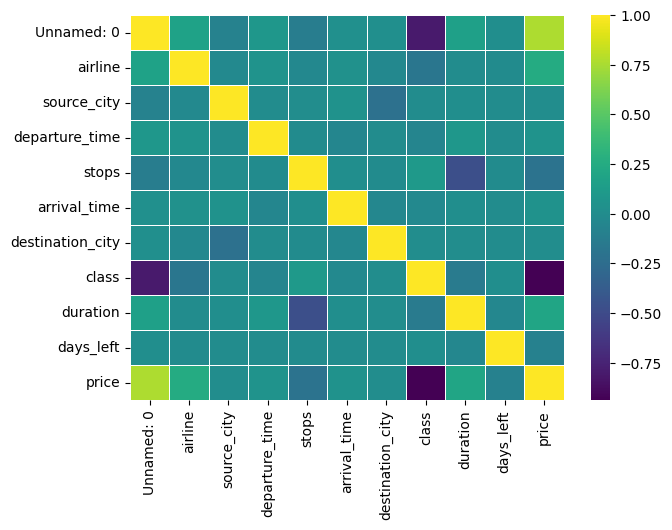

In [7]:
correlation=new_df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation, cmap='viridis', linewidths=.5)
plt.show()

In [8]:
new_df.columns

Index(['Unnamed: 0', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## Split Xy

In [9]:
x=new_df[['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']]
y=new_df['price']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split (x,y,test_size=0.20,random_state=42,shuffle=True)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240122, 9)
y_train shape: (240122,)
X_test shape: (60031, 9)
y_test shape: (60031,)


## feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

## KNN Model

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)

In [16]:
knn.fit(X_train_standardized,y_train)

KNeighborsRegressor(n_neighbors=3)

In [17]:
y_preidict_knn=knn.predict(X_test_standardized)

## Evaluate Model

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
mae=mean_absolute_error(y_test,y_preidict_knn)
mae

1670.2320634338926

In [20]:
mse=mean_squared_error(y_test,y_preidict_knn)
mse

13286741.245724894

In [21]:
r2=r2_score(y_test,y_preidict_knn)
r2

0.9742246398625196

## Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr=LinearRegression()

In [24]:
lr.fit(X_train_standardized,y_train)

LinearRegression()

In [25]:
predict=lr.predict(X_test_standardized)

In [26]:
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
r2=r2_score(y_test,predict)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',r2)

MAE: 4624.994868017024
MSE: 49200540.29372198
R2 Score: 0.904554350718816


In [27]:
from sklearn.svm import SVR
svr=SVR()

In [ ]:
svr.fit(X_train_standardized,y_train)

In [ ]:
predict_svr=svr.predict(X_test_standardized)

In [ ]:
mae=mean_absolute_error(y_test,predict_svr)
mse=mean_squared_error(y_test,predict_svr)
r2=r2_score(y_test,predict_svr)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',r2)